In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact
import ipywidgets as widgets

# Bayesian treatment of single-paramter models

## 2. Beta-binomial model

Let's get back to our binomial example from week 03. Suppose we have flipped a coin 32 times and it came up heads 24 times. We have seen that the maximum-likelihood approach tells us that we should infer a probability of $\hat\theta = \frac{24}{32} = 0.75$ of heads. Is this reasonable? If all we have at our hands is this single observation, this is the best we can do. But often we know something about the problem before observing any data - we have prior knowledge. For example, we know that most coins are fair, in that they tend to come up heads half of the time. Maybe some are a bit uneven and therefore have a slight bias in one direction or the other, but by and large we expect coins to have a probability of $\frac{1}{2}$ of coming up heads. Can we formalize this prior knowledge as a prior distribution?

### 2.1 The beta distribution

In week 2 you got to know the Beta distribution among other things. Take a look at the notebook `02a-Distributions.ipynb` if you don't remember. The Beta distribution was defined on an interval $[0,1]$ and is therefore perfect for expressing beliefs about probabilities. In other words, it can be seen as a distribution over distributions.

Reminder from week 2: It has two parameters $\alpha$ and $\beta$, which can take any positive real value:

$$ f(\theta|\alpha,\beta)=\frac{1}{\mathrm{B}(\alpha ,\beta )}\theta^{\alpha -1}(1-\theta)^{\beta -1} := \text{Beta}(\alpha,\beta) $$

Let's assume again, that we are modeling for the probability of a coin coming up heads called $\theta$. Play around with the parameters of the beta distribution to express the following beliefs about $\theta$:

- You are pretty sure that $\theta$ is close to 0.5
- You think that every value for $\theta$ is equally possible
- You think that extreme values (close to 0 or 1) are more likely than intermediate values

Include plots in your solution and write down the parameter values $\alpha$ and $\beta$ used to create them.

The coin toss is one common example, for which a Beta prior that favors values close to 0.5 is appropriate, but the Beta distribution is a very general tool for thinking about probabilities. For example think about the probability of being infected with some very rare disease. Here it would make sense to have a prior that assigns more probability to low values, since we know the disease is really rare.



In [3]:
from scipy.stats import beta

@interact(a=widgets.FloatSlider(min=0.5, max=10., value=2., step=0.5, description=r'$\alpha$'), 
          b=widgets.FloatSlider(min=0.5, max=10., value=6., step=0.5, description=r'$\beta$'))
def plot_beta(a, b):
    theta = np.linspace(0, 1)
    plt.xlabel(r'$\theta$')
    plt.title('Beta Distribution')
    plt.plot(theta, beta.pdf(theta,a=a,b=b))

interactive(children=(FloatSlider(value=2.0, description='$\\alpha$', max=10.0, min=0.5, step=0.5), FloatSlide…

### 2.2 The posterior distribution and Conjugate priors

It is of course no coincidence that we want to use the beta distribution here. Besides its properties on the interval [0,1] it has another useful property. If we are interested in the posterior distribution over $\theta$ for the coin flip example and choose the Beta distribution as prior, then we get a beta distribution as posterior again!

You can show (and you will do in the practical assignment!) that the posterior distribution for a Binomial likelihood and a Beta prior is again a Beta distribution with

$$ p(\theta | k, n, \alpha, \beta) = \text{Beta}(\theta | \alpha + k, \beta + n - k) $$

This concept is called __conjugate prior__! If the posterior and the prior are in the same probability distribution family you call them conjugate distributions, and the prior is called a conjugate prior for the likelihood function.

We hope that you have now fallen off your chair out of sheer enthusiasm. No? Then here is a small example of why the concept of Conjugate Prior is so ingenious and helpful.

For example, instead of a Beta prior, you could have chosen a Gaussian distribution. The likelihood stays binomial distributed and the prior would be

$$ p(\theta) = \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{(\theta-\mu)^2}{2\sigma^2}} $$

How would the posterior look then (only for one coin toss $x$)?

$$ p(\theta|x) = \frac{ \theta^x (1-\theta)^{1-x} \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{(\theta-\mu)^2}{2\sigma^2}}}{\int \theta^x (1-\theta)^{1-x} \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{(\theta-\mu)^2}{2\sigma^2}} d\theta} $$

This equation contains a nasty integral over our parameter $\theta$, which cannot be solved analytically.

Conjugate prior therefore helps us to calculate the Posterior Distribution analytically, since the resulting distribution lies in the same family.

### 2.3 Comparison of Posterior and Maximum Likelihood

Let us now compare our results from week 3 and from today. So we plot the maximum likelihood estimator for a fixed $n$ and $k$, and the posterior for the parameters $\alpha$ and $\beta$ of the prior.

In [3]:
a=widgets.FloatSlider(min=0.5, max=10., value=2., step=0.5, description = r'$\alpha$')
b=widgets.FloatSlider(min=0.5, max=10., value=6., step=0.5 , description = r'$\beta$')
n_widget = widgets.IntSlider(min=1, max=100, step=1, value=32, description = r'$n$')
k_widget = widgets.IntSlider(min=1, max=100, step=1, value=24, description = r'$k$')

def update_range(*args):
    k_widget.max = n_widget.value
    
k_widget.observe(update_range, 'value')

def plot_beta_posterior(a, b, n, k):
    theta = np.linspace(0, 1, 100)
    plt.plot(theta, beta.pdf(theta, a=a, b=b), label="Prior")
    
    plt.plot(theta, beta.pdf(theta, a=a+k, b=b+n-k), label="Posterior")
    
    plt.axvline(k / n, label="MLE", linestyle="--", color="C2")
    
    plt.legend()
    
interact(plot_beta_posterior, a=a, b=b, n=n_widget, k=k_widget);

interactive(children=(FloatSlider(value=2.0, description='$\\alpha$', max=10.0, min=0.5, step=0.5), FloatSlide…

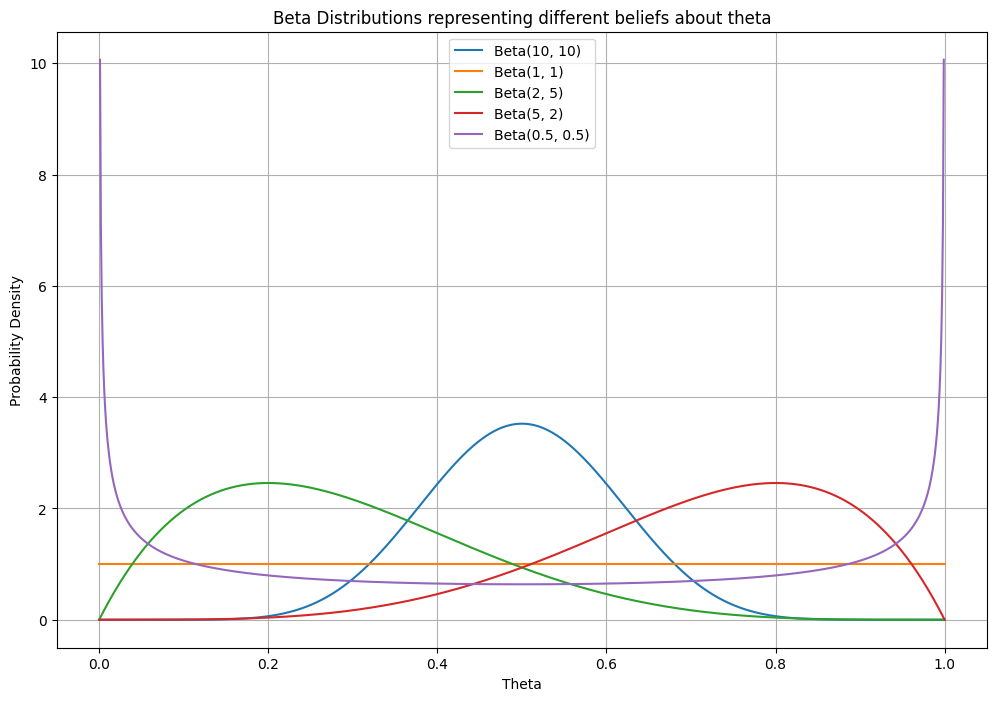

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_dist

# Define parameter values for each belief
params = [
    (10, 10),  # Pretty sure that theta is close to 0.5
    (1, 1),    # Every value for theta is equally possible
    (2, 5),    # Extreme values are more likely than intermediate values (skewed towards 0)
    (5, 2),     # Extreme values are more likely than intermediate values (skewed towards 1)
    (0.5, 0.5)
]

# Define range for theta
theta_values = np.linspace(0, 1, 1000)

# Plot the Beta distributions for each belief
plt.figure(figsize=(12, 8))
for idx, (alpha, beta) in enumerate(params):
    plt.plot(theta_values, beta_dist.pdf(theta_values, alpha, beta), label=f'Beta({alpha}, {beta})')

# Add labels and legend
plt.title('Beta Distributions representing different beliefs about theta')
plt.xlabel('Theta')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


def plot_beta(a, b):
    theta = np.linspace(0, 1)
    plt.xlabel(r'$\theta$')
    plt.title('Beta Distribution')
    plt.plot(theta, beta.pdf(theta,a=a,b=b))
